# Analyze GT MRI data

83.333 Hz MRI coordinates, 310 channels, 155 x-y coordinate pairs

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
sacra_r1_import = np.load("../../../mri/gt_npy/F_25_Napa_bVt_r1_0.npy", allow_pickle=True)

print(f"Shape of imported npy (seq_len, 310): {sacra_r1_import.shape}")

Shape of imported npy (seq_len, 310): (61, 310)


In [25]:
def convert2pltorder(arr):
    """
    Args
        arr: shape (seq_len, 310)
            feat_list = [feat0[:, 0], feat0[:, 1],
                         new_feat1[:, 0], new_feat1[:, 1],
                         feat2[:, 0], feat2[:, 1]]
            new_feat1 has length 25
    Return:
        new_arr: shape (seq_len, 170, 2)
            idxs [90,105) out of [0,170) are for back features
            feat0 (70), feat1 (40), feat2 (60)
    """
    track_array = []
    for carr in arr:
        feat0_x = carr[:70]
        feat0_y = carr[70:140]
        feat1_x = np.concatenate([carr[140:160], np.zeros(15), carr[160:165]])
        feat1_y = np.concatenate([carr[165:185], np.zeros(15), carr[185:190]])
        feat2_x = carr[190:250]
        feat2_y = carr[250:]
        frame_array = np.stack([np.concatenate([feat0_x, feat1_x, feat2_x]), np.concatenate([feat0_y, feat1_y, feat2_y])], axis=0).transpose(1, 0)  # (170, 2)
        track_array.append(frame_array)
    track_array = np.stack(track_array, axis=0)  # (Y, 170, 2)
    return track_array

In [26]:
sacra_converted = convert2pltorder(sacra_r1_import)

print(f"Shape of converted npy (seq_len, 170, 2): {sacra_converted.shape}")

Shape of converted npy (seq_len, 170, 2): (61, 170, 2)


## Mapping converted npy to specific parts:

epiglottis:     0:10

tongue:         10:30

lower teeth:    30:35

lower lip:      35:45

chin:           45:60

neck:           60:70

arytenoid:      70:80

pharynx:        80:90

back:           90:105

trachea:        105:110

hard palate:    110:120

velum:          120:135

nasal cavity:   135:150

nose:           150:160

upper lip:      160:170

We care about tongue, so we will use 10:30

In [27]:
tongue_sacra = np.array([i[10:30] for i in sacra_converted])
print(f"Shape of tongue_sacra (seq_len, 20, 2): {tongue_sacra.shape}")

Shape of tongue_sacra (seq_len, 20, 2): (61, 20, 2)


# Visualizing tongue

Text(0.5, 1.0, 'x-y Tongue Visualization for First Frame')

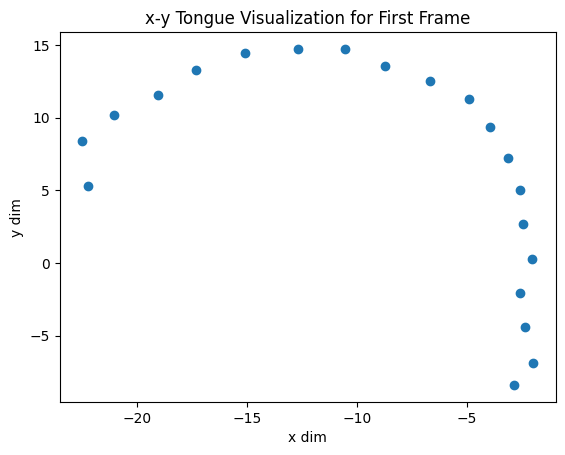

In [29]:
tongue_first_frame = tongue_sacra[0]

get_col = lambda arr, dim: [i[dim] for i in arr]

tongue_first_frame_x = get_col(tongue_first_frame, 0)
tongue_first_frame_y = get_col(tongue_first_frame, 1)

plt.scatter(tongue_first_frame_x, tongue_first_frame_y)
plt.xlabel("x dim")
plt.ylabel("y dim")
plt.title("x-y Tongue Visualization for First Frame")